# Agregaciones: Mínimo, máximo y todo lo que hay entre medias

A menudo, cuando nos enfrentamos a una gran cantidad de datos, un primer paso es calcular los estadísticos de resumen de los datos en cuestión.
Quizás los estadísticos de resumen más comunes son la media y la desviación estándar, que permiten resumir los valores "típicos" de un conjunto de datos, pero también son útiles otros agregados (la suma, el producto, la mediana, el mínimo y el máximo, los cuantiles, etc.).

NumPy tiene funciones de agregación rápidas incorporadas para trabajar con matrices; aquí discutiremos y demostraremos algunas de ellas.

## Suma de los valores de un array

Como un ejemplo rápido, considere el cálculo de la suma de todos los valores en un array.
Python mismo puede hacer esto usando la función incorporada ``sum``:

In [ ]:
import numpy as np

In [ ]:
L = np.random.random(100)
sum(L)

55.61209116604941

La sintaxis es bastante similar a la de la función ``suma`` de NumPy, y el resultado es el mismo en el caso más sencillo:

In [ ]:
np.sum(L)

55.612091166049424

Sin embargo, como ejecuta la operación en código compilado, la versión de NumPy de la operación se calcula mucho más rápidamente:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 104 ms per loop
1000 loops, best of 3: 442 µs per loop


Pero ten cuidado: la función ``suma`` y la función ``np.sum`` no son idénticas, lo que a veces puede llevar a confusión.
En particular, sus argumentos opcionales tienen diferentes significados, y ``np.sum`` es consciente de las múltiples dimensiones del array, como veremos en la siguiente sección.

## Mínimo y Máximo

Del mismo modo, Python tiene incorporadas las funciones ``min`` y ``max``, utilizadas para encontrar el valor mínimo y el valor máximo de cualquier array dado:

In [ ]:
min(big_array), max(big_array)

(1.1717128136634614e-06, 0.9999976784968716)

Las funciones correspondientes de NumPy tienen una sintaxis similar, y de nuevo operan mucho más rápidamente:

In [ ]:
np.min(big_array), np.max(big_array)

(1.1717128136634614e-06, 0.9999976784968716)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 82.3 ms per loop
1000 loops, best of 3: 497 µs per loop


Para ``min``, ``max``, ``sum`` y otros agregados de NumPy, una sintaxis más corta es utilizar los métodos del propio objeto array:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

1.17171281366e-06 0.999997678497 499911.628197


Siempre que sea posible, asegúrese de que utiliza la versión NumPy de estos agregados cuando opere con matrices NumPy.

### Agregados multidimensionales

Un tipo común de operación de agregación es un agregado a lo largo de una fila o columna.
Digamos que tiene algunos datos almacenados en un array bidimensional:

In [ ]:
M = np.random.random((3, 4))
print(M)

[[ 0.8967576   0.03783739  0.75952519  0.06682827]
 [ 0.8354065   0.99196818  0.19544769  0.43447084]
 [ 0.66859307  0.15038721  0.37911423  0.6687194 ]]


Por defecto, cada función de agregación de NumPy devolverá el agregado sobre todo el array:

In [ ]:
M.sum()

6.0850555667307118

Las funciones de agregación toman un argumento adicional que especifica el *eje* a lo largo del cual se calcula el agregado. Por ejemplo, podemos encontrar el valor mínimo dentro de cada columna especificando ``eje=0``:

In [ ]:
M.min(axis=0)

array([ 0.66859307,  0.03783739,  0.19544769,  0.06682827])

La función devuelve cuatro valores, correspondientes a las cuatro columnas de números.

Del mismo modo, podemos encontrar el valor máximo dentro de cada fila:

In [ ]:
M.max(axis=1)

array([ 0.8967576 ,  0.99196818,  0.6687194 ])

La forma en que se especifica el eje aquí puede ser confusa para los usuarios que vienen de otros lenguajes.
La palabra clave ``axis`` especifica la *dimensión del array que se colapsará*, en lugar de la dimensión que se devolverá.
Así que especificar ``axis=0`` significa que el primer eje será colapsado: para arrays bidimensionales, esto significa que los valores dentro de cada columna serán agregados.

### Otras funciones de agregación

NumPy proporciona muchas otras funciones de agregación, pero no las discutiremos en detalle aquí.
Además, la mayoría de los agregados tienen una contraparte ``NaN`` segura que calcula el resultado ignorando los valores perdidos, que están marcados por el valor especial de punto flotante IEEE ``NaN`` (para una discusión más completa de los datos perdidos, ver [Manejo de Datos Perdidos](03.04-Missing-Values.ipynb)).
Algunas de estas funciones seguras para ``NaN`` no se añadieron hasta NumPy 1.8, por lo que no estarán disponibles en versiones anteriores de NumPy.

La siguiente tabla proporciona una lista de funciones de agregación útiles disponibles en NumPy:

|Nombre de la función|Versión a prueba de NaN | Descripción                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Calcula la suma de elementos|
| ``np.prod``       | ``np.nanprod``      | Calcular el producto de los elementos|
| ``np.mean``       | ``np.nanmean``      | Calcula la media de los elementos|
| ``np.std``        | ``np.nanstd``       | Calcular la desviación estándar|
| ``np.var``        | ``np.nanvar``       | Calcular la varianza|
| ``np.min``        | ``np.nanmin``       | Buscar el valor mínimo                   |
| ``np.max``        | ``np.nanmax``       | Buscar el valor máximo                   |
| ``np.argmin``     | ``np.nanargmin``    | Buscar el índice del valor mínimo|
| ``np.argmax``     | ``np.nanargmax``    | Buscar el índice del valor máximo|
| ``np.median``     | ``np.nanmedian``    | Calcular la mediana de los elementos|
| ``np.percentile`` | ``np.nanpercentile``| Calcular las estadísticas basadas en el rango de los elementos     |
| ``np.any``        | N/A                 | Evaluar si algún elemento es verdadero.|
| ``np.all``        | N/A                 | Evaluar si todos los elementos son verdaderos.
|

Veremos estos agregados con frecuencia a lo largo del resto del libro.

## Ejemplo: ¿Cuál es la altura media de los presidentes de EE.UU.?

Los agregados disponibles en NumPy pueden ser extremadamente útiles para resumir un conjunto de valores.
Como ejemplo sencillo, consideremos las alturas de todos los presidentes de Estados Unidos.
Estos datos están disponibles en el archivo *president_heights.csv*, que es una simple lista separada por comas de etiquetas y valores:

In [ ]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


Utilizaremos el paquete Pandas, que exploraremos más a fondo en el [Capítulo 3](03.00-Introducción-a-Pandas.ipynb), para leer el archivo y extraer esta información (nótese que las alturas se miden en centímetros).

In [ ]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Ahora que tenemos este array de datos, podemos calcular una variedad de estadísticas de resumen:

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


Obsérvese que en cada caso, la operación de agregación redujo todo el array a un único valor de resumen, que nos da información sobre la distribución de los valores.
También podemos querer calcular los cuantiles:

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Vemos que la estatura media de los presidentes de EE.UU. es de 182 cm, es decir, poco menos de 1,80 metros.

Por supuesto, a veces es más útil ver una representación visual de estos datos, lo que podemos conseguir utilizando herramientas de Matplotlib (hablaremos de Matplotlib con más detalle en el [Capítulo 4](04.00-Introduction-To-Matplotlib.ipynb)). Por ejemplo, este código genera el siguiente gráfico:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # establecer el estilo del diagrama

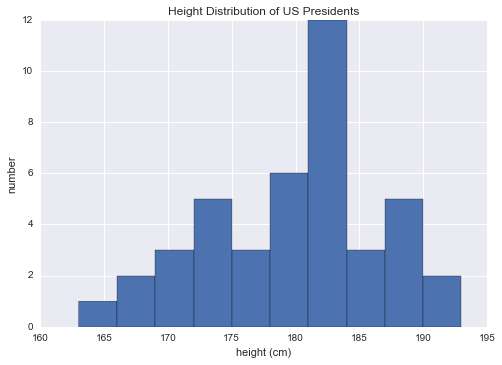

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

Estos agregados son algunas de las piezas fundamentales del análisis exploratorio de datos que exploraremos con mayor profundidad en capítulos posteriores del libro.